### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('data/coupons.csv')

In [3]:
df.head()

,If destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   If destination        12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

C:\Users\rodne\AppData\Local\Temp\ipykernel_3296\410718689.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


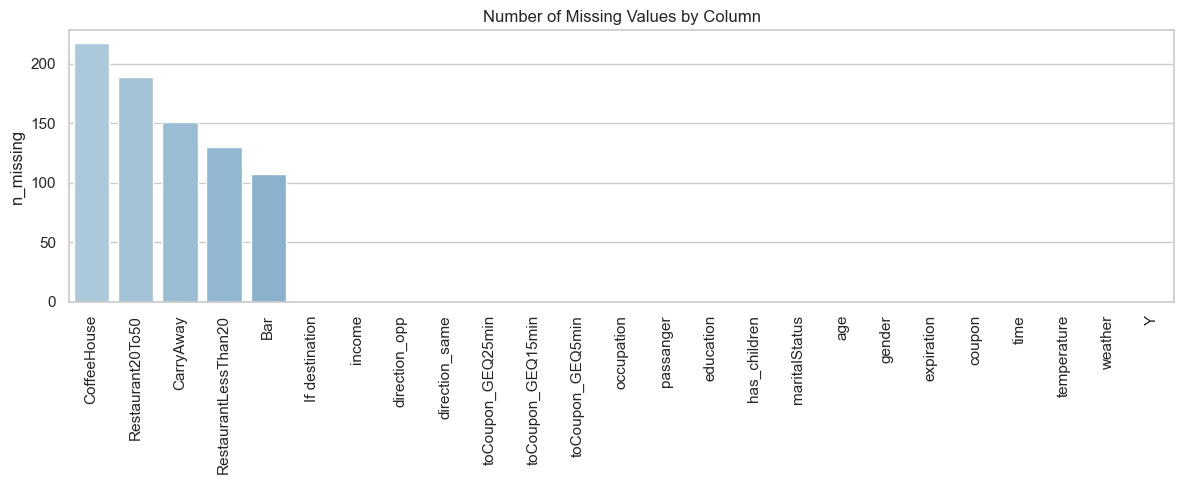

C:\Users\rodne\AppData\Local\Temp\ipykernel_3296\410718689.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


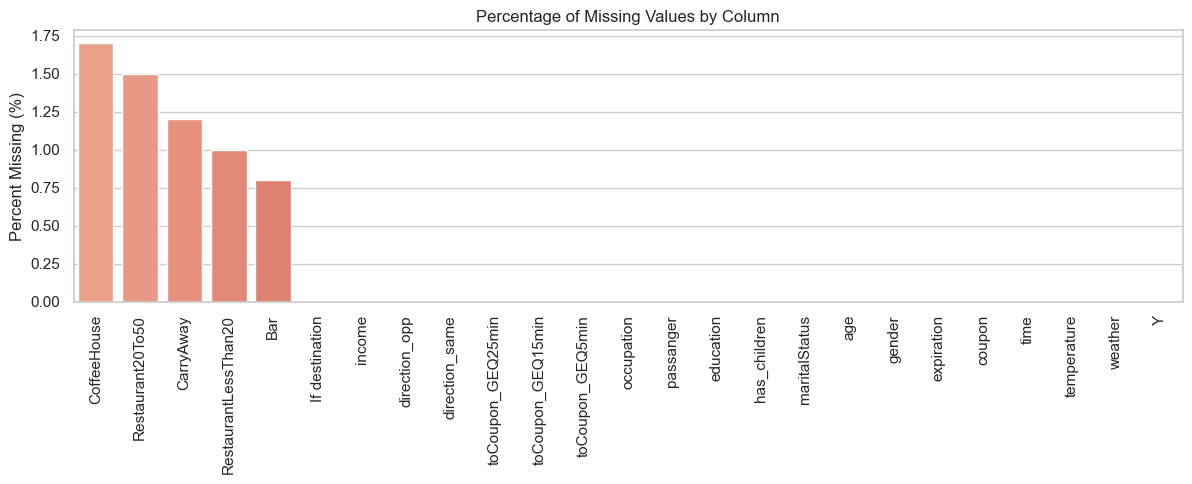

C:\Users\rodne\AppData\Local\Temp\ipykernel_3296\410718689.py:52: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\rodne\anaconda3\envs\ds\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8208 (\N{HYPHEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


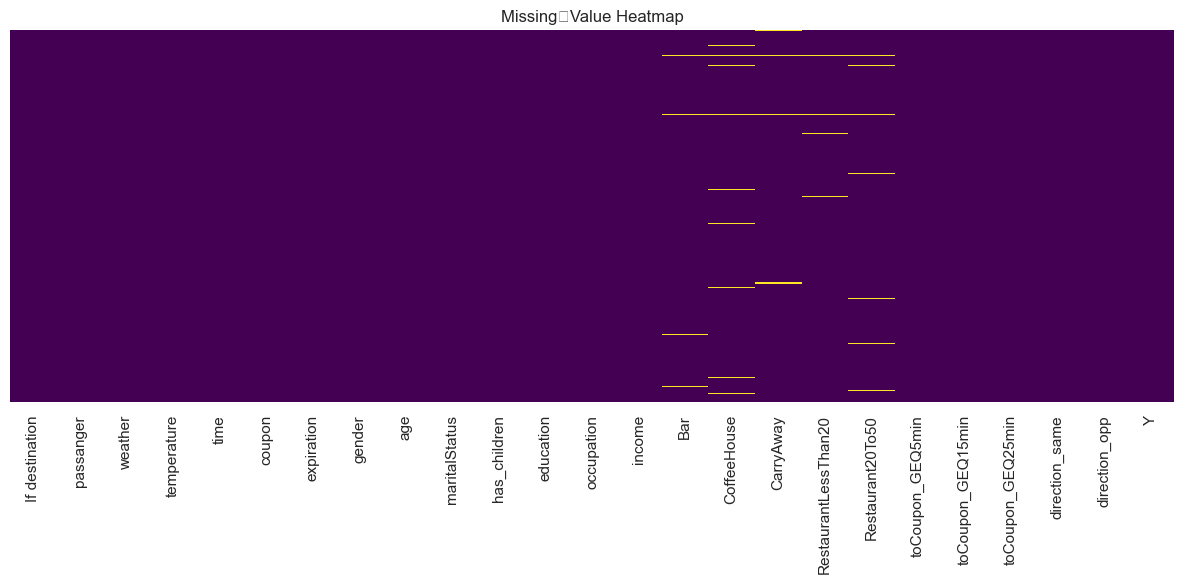

Found 148 duplicate row occurrences:

     If destination passanger weather  temperature  time  \
4191           Work     Alone   Sunny           80   7AM   
4192           Work     Alone   Sunny           80   7AM   
4235           Work     Alone   Sunny           80   7AM   
4236           Work     Alone   Sunny           80   7AM   
4279           Work     Alone   Sunny           80   7AM   
...             ...       ...     ...          ...   ...   
8511           Home     Alone   Sunny           80   6PM   
8512           Home   Partner   Sunny           30  10PM   
8513           Work     Alone   Rainy           55   7AM   
8515           Work     Alone   Snowy           30   7AM   
8516           Work     Alone   Sunny           80   7AM   

                     coupon expiration  gender age    maritalStatus  ...  \
4191  Carry out & Take away         1d    Male  26           Single  ...   
4192  Carry out & Take away         1d    Male  26           Single  ...   
4235  Carry o

In [4]:
df.info()
df.describe(include="all").T

df = df.drop(columns='car')

missing = df.isnull().sum().rename("n_missing").to_frame()
missing["pct_missing"] = (df.isnull().mean() * 100).round(1)
missing = missing.sort_values("n_missing", ascending=False)

# Print the table
print("Missing Values by Column")
print("===================================")
print(missing)



print("\nPlot of Missing Values by Column (in values)")
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))
sns.barplot(
    data=missing.reset_index().rename(columns={"index": "column"}),
    x="column", y="n_missing", palette="Blues_d"
)
plt.xticks(rotation=90)
plt.title("Number of Missing Values by Column")
plt.xlabel("")
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
sns.barplot(
    data=missing.reset_index().rename(columns={"index": "column"}),
    x="column", y="pct_missing", palette="Reds_d"
)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values by Column")
plt.ylabel("Percent Missing (%)")
plt.xlabel("")
plt.tight_layout()
plt.show()

# 4) Heatmap of the raw mask
plt.figure(figsize=(12, 6))
sns.heatmap(
    df.isnull(),
    cbar=False,
    cmap="viridis",
    yticklabels=False
)
plt.title("Missing‐Value Heatmap")
plt.tight_layout()
plt.show()

# check for duplicates
dupe_mask = df.duplicated(keep=False)
duplicate_rows = df[dupe_mask]

print(f"Found {len(duplicate_rows)} duplicate row occurrences:\n")
print(duplicate_rows)

#  check categorical values
print("Check Categorical Values") 
cat_cols = df.select_dtypes(include="object").columns
for c in cat_cols:
    print(f"\n{c} unique values:")
    print(df[c].value_counts(dropna=False))

for col in ["temperature","age","CoffeeHouse","CarryAway"]:
    coerced = pd.to_numeric(df[col], errors="coerce")
    n_bad   = coerced.isnull().sum() - df[col].isnull().sum()
    print(f"{col!r}: {n_bad} values couldn’t convert to numeric")

# detect outliers
num_cols = df.select_dtypes(include=[np.number]).columns
zs = np.abs((df[num_cols] - df[num_cols].mean())/df[num_cols].std())
outliers = (zs > 3).sum().sort_values(ascending=False)
print("\nOutlier counts (|z|>3):")



3. Decide what to do about your missing data -- drop, replace, other...

In [4]:
# drop car column
if "car" in df.columns:
    df.drop(columns=["car"], inplace=True) 
# fill NaN columns with 0
df['Bar'] = df['Bar'].fillna(0)
df['CoffeeHouse'] = df['CoffeeHouse'].fillna(0)
df['CarryAway'] = df['CarryAway'].fillna(0)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].fillna(0)
df['Restaurant20To50'] = df['Restaurant20To50'].fillna(0)

# consolidate the time to the coupon into the time_to_coupon column
df['time_to_coupon'] = np.select(
    [
        df['toCoupon_GEQ25min'] == 1,
        df['toCoupon_GEQ15min'] == 1,
        df['toCoupon_GEQ5min' ] == 1
    ],
    [25, 15, 5],
    default=0  
)

df = df.drop(columns=[
    'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'
])

print(df['time_to_coupon'].value_counts())




time_to_coupon
15    5611
5     5562
25    1511
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [5]:
accepted = df[df['Y'] == 1]
proportion_accepted = len(accepted) / len(df)
print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")

Proportion of accepted coupons: 56.84%


5. Use a bar plot to visualize the `coupon` column.

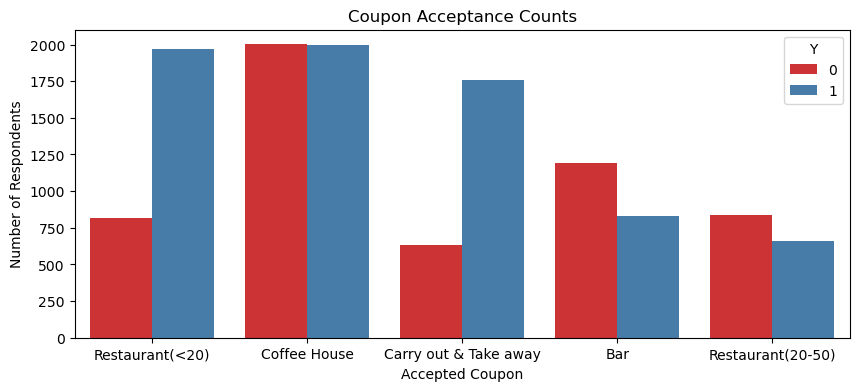

In [6]:


plt.figure(figsize=(10,4))
sns.countplot(data=df, x='coupon', hue='Y', palette='Set1')
plt.title('Coupon Acceptance Counts')
plt.xlabel('Accepted Coupon')
plt.ylabel('Number of Respondents')
plt.show()


6. Use a histogram to visualize the temperature column.

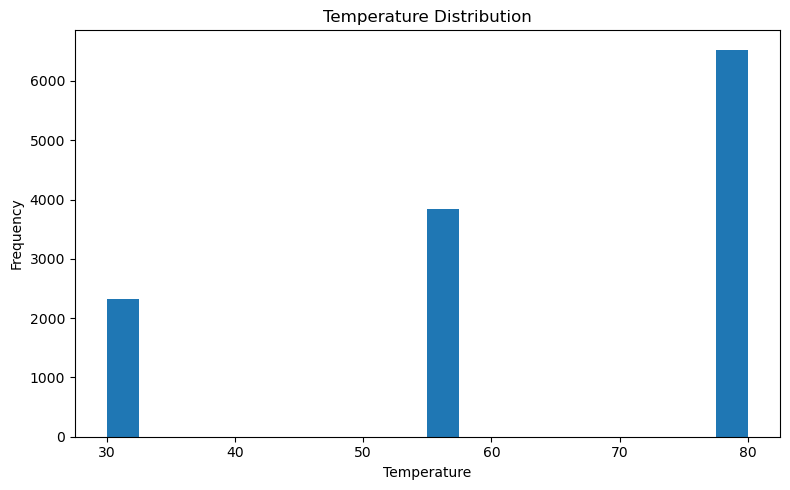

In [7]:
temps = df['temperature'].dropna()

plt.figure(figsize=(8, 5))
plt.hist(temps, bins=20)          # adjust bins as needed
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [8]:
df['accepted'] = (df['Y'] == 1).astype(int)
bar_df = df.loc[df['coupon'] == 'Bar', :].copy()


2. What proportion of bar coupons were accepted?


In [9]:

prop_accepted = bar_df['accepted'].mean()
print(f"Proportion of Bar coupons accepted: {prop_accepted:.2%}")

Proportion of Bar coupons accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate (≤3 bar visits/mo): 37.06%
Acceptance rate (>3 bar visits/mo): 76.88%


C:\Users\rodne\AppData\Local\Temp\ipykernel_884\3177370253.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


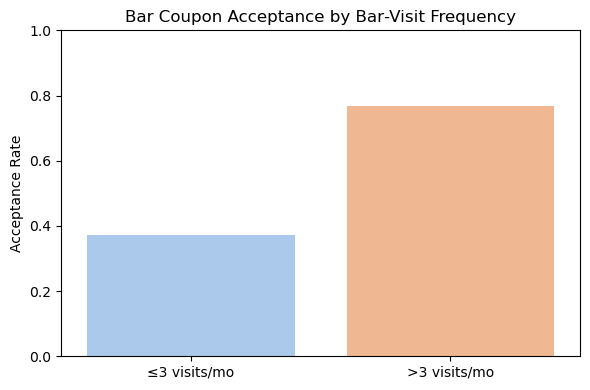

In [10]:

low_freq = ['never', 'less1', '1~3'] 
high_freq = ['4~8', 'gt8']      

low_rate  = bar_df.loc[bar_df['Bar'].isin(low_freq),  'accepted'].mean()
high_rate = bar_df.loc[bar_df['Bar'].isin(high_freq), 'accepted'].mean()


print(f"Acceptance rate (≤3 bar visits/mo): {low_rate:.2%}")
print(f"Acceptance rate (>3 bar visits/mo): {high_rate:.2%}")

plot_df = pd.DataFrame({
    'Visit Frequency': ['≤3 visits/mo', '>3 visits/mo'],
    'Acceptance Rate': [low_rate, high_rate]
})

plt.figure(figsize=(6,4))
sns.barplot(
    data=plot_df,
    x='Visit Frequency',
    y='Acceptance Rate',
    palette='pastel'
)
plt.ylim(0,1)
plt.title('Bar Coupon Acceptance by Bar‐Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.xlabel('')
plt.tight_layout()
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
def parse_age(x):
    if x == 'below21': return 20
    if x == '50plus':   return 50
    try:
        return float(x)
    except:
        return np.nan

df['age_num'] = df['age'].apply(parse_age)
age_mask = df['age_num'] > 25
rate_group = bar_df.loc[age_mask,  'accepted'].mean()
rate_other = bar_df.loc[~age_mask, 'accepted'].mean()
diff       = rate_group - rate_other

print(f"Acceptance rate (>1 bar & age>25): {rate_group:.2%}")
print(f"Acceptance rate (all others):       {rate_other:.2%}")
print(f"Difference (group − others):        {diff:.2%}")

Acceptance rate (>1 bar & age>25): 38.33%
Acceptance rate (all others):       49.01%
Difference (group − others):        -10.67%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [16]:
bar_freq_mask = bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])
passenger_mask = bar_df['passanger'].isin(['Friend(s)', 'Partner'])
occupation_mask = bar_df['occupation'] != 'Farming Fishing & Forestry'

group_mask = bar_freq_mask & passenger_mask & occupation_mask

rate_group = bar_df.loc[group_mask,  'accepted'].mean()
rate_other = bar_df.loc[~group_mask, 'accepted'].mean()
diff = rate_group - rate_other

print(f"Acceptance rate (>1 bar & passengers not a kid & occupations other than farming, fishing or forestry): {rate_group:.2%}")
print(f"Acceptance rate (all others):       {rate_other:.2%}")
print(f"Difference (group − others):        {diff:.2%}")


Acceptance rate (>1 bar & passengers not a kid & occupations other than farming, fishing or forestry): 71.79%
Acceptance rate (all others):       37.71%
Difference (group − others):        34.09%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [17]:

not_widowed_mask = df['maritalStatus'] != 'Widowed'
group_mask = bar_freq_mask & passenger_mask & not_widowed_mask

rate_group = df.loc[group_mask, 'accepted'].mean()
rate_other = df.loc[~group_mask, 'accepted'].mean()

print(f"Acceptance rate (>1 bar & friends/partner & not widowed): {rate_group:.2%}")
print(f"Acceptance rate (others):                                {rate_other:.2%}")

age_mask   = df['age_num'] < 30
group_mask = bar_freq_mask & age_mask

rate_group = df.loc[group_mask, 'accepted'].mean()
print(f"Acceptance rate (>1 bar & age < 30): {rate_group:.2%}")

cheap_restaurant_mask = df['RestaurantLessThan20'].isin(['4~8','gt8'])
income_mask           = df['income'].isin([
    'Less than $12500', '$12500 - $24999',
    '$25000 - $37499', '$37500 - $49999'
])
group_mask = cheap_restaurant_mask & income_mask

rate_group = df.loc[group_mask, 'accepted'].mean()
print(f"Acceptance rate (>4 cheap restaurant visits & income <50K): {rate_group:.2%}")



Acceptance rate (>1 bar & friends/partner & not widowed): 71.79%
Acceptance rate (others):                                56.61%
Acceptance rate (>1 bar & age < 30): 72.17%
Acceptance rate (>4 cheap restaurant visits & income <50K): 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [18]:
#rate_no_bar = df.loc[bar_freq_mask, 'accepted'].mean()
print("Drivers under 30, not widowed, who go to bars more than once a month, and travel with")
print("friends or a partner, are significantly more likely to accept Bar coupons—about 72% vs.")
print ("56.6% for others.  This suggests that Bar coupons appeal to younger drivers who regularly go out socially with friends or a partner.")





Drivers under 30, not widowed, who go to bars more than once a month, and travel with
friends or a partner, are significantly more likely to accept Bar coupons—about 72% vs.
56.6% for others.  This suggests that Bar coupons appeal to younger drivers who regularly go out socially with friends or a partner.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Offered Restaurant20–50: 1492
Accepted:             658  (44.1%)

— age among acceptors:
age
26         21.9
21         19.9
31         14.9
50plus     12.0
36         11.9
41          9.3
46          6.2
below21     4.0
Name: proportion, dtype: float64

— gender among acceptors:
gender
Male      51.1
Female    48.9
Name: proportion, dtype: float64

— passanger among acceptors:
passanger
Alone        64.7
Partner      13.5
Friend(s)    11.9
Kid(s)        9.9
Name: proportion, dtype: float64

— time among acceptors:
time
6PM     29.6
7AM     26.0
10PM    19.0
2PM     14.9
10AM    10.5
Name: proportion, dtype: float64

— income among acceptors:
income
$25000 - $37499     17.6
$100000 or More     15.5
$50000 - $62499     15.2
$37500 - $49999     14.0
$12500 - $24999     11.9
$75000 - $87499      7.4
Less than $12500     6.8
$87500 - $99999      6.2
$62500 - $74999      5.3
Name: proportion, dtype: float64

— Δ in age:
age
21        -0.1
26         4.4
31        -1.5
36         1.3
41     

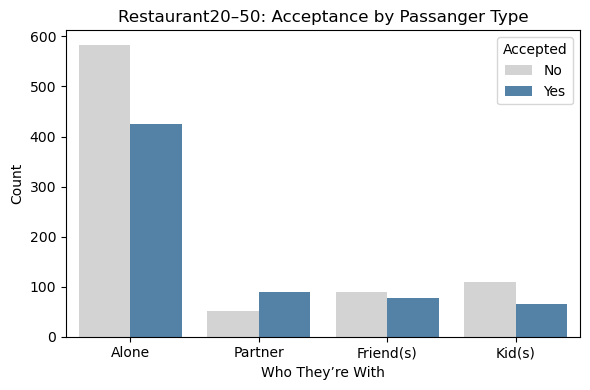

Y,0,1,accept_rate
age,,,
21,16700.0%,13100.0%,44.0%
26,14600.0%,14400.0%,49.7%
31,13700.0%,9800.0%,41.7%
36,8800.0%,7800.0%,47.0%
41,7300.0%,6100.0%,45.5%
46,4300.0%,4100.0%,48.8%
50plus,14300.0%,7900.0%,35.6%
below21,3700.0%,2600.0%,41.3%


In [19]:
mask_offer   = df['coupon'] == 'Restaurant(20-50)'

mask_accept  = mask_offer & (df['Y'] == 1)
mask_reject  = mask_offer & (df['Y'] == 0)


n_offer   = mask_offer.sum()
n_accept  = mask_accept.sum()
rate_accept = n_accept / n_offer

print(f"Offered Restaurant20–50: {n_offer}")
print(f"Accepted:             {n_accept}  ({rate_accept:.1%})")

# demographic breakdown of acceptors
features = ['age', 'gender', 'passanger', 'time', 'income']

for col in features:
    print(f"\n— {col} among acceptors:")
    print(df.loc[mask_accept, col]
            .value_counts(normalize=True)
            .mul(100)
            .round(1)
    )

for col in features:
    pct_accept = (
        df.loc[mask_accept, col]
          .value_counts(normalize=True)
    )
    pct_reject = (
        df.loc[mask_reject, col]
          .value_counts(normalize=True)
    )
    print(f"\n— Δ in {col}:")
    print((pct_accept - pct_reject)
            .mul(100)
            .round(1)
    )    
plt.figure(figsize=(6,4))
sns.countplot(
    data=df[mask_offer],
    x='passanger',
    hue='Y',
    palette=('lightgray','steelblue')
)

plt.title("Restaurant20–50: Acceptance by Passanger Type")
plt.xlabel("Who They’re With")
plt.ylabel("Count")
plt.legend(title="Accepted", labels=("No","Yes"))
plt.tight_layout()
plt.show()

pd.pivot_table(
    df[mask_offer],
    index='age',  
    columns='Y',
    values='coupon',
    aggfunc='count',
    observed=False
).assign(
    accept_rate=lambda d: d[1] / (d[0] + d[1])
).style.format("{:.1%}") 